In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from agent import Agent
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# definition hyperparameters, trainingsconditions and environment
env = UnityEnvironment(file_name='Env_1_Agent/Reacher_Linux/Reacher.x86_64')
n_episodes = 10
training_mode = False

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# reset the environment
env_info = env.reset(train_mode=training_mode)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33


In [5]:
# get trained agent
agent = Agent(state_size=state_size, action_size=action_size)
agent.actor_local.load_state_dict(torch.load('checkpoint_Actor.pth', map_location=lambda storage, loc: storage))
agent.critic_local.load_state_dict(torch.load('checkpoint_Critic.pth', map_location=lambda storage, loc: storage))

 Score trained agent:37.09999917075038
 Score trained agent:35.999999195337296
 Score trained agent:38.519999139010906
 Score trained agent:39.27999912202358
 Score trained agent:39.519999116659164
 Score trained agent:39.61999911442399
 Score trained agent:39.02999912761152
 Score trained agent:39.41999911889434
 Score trained agent:38.24999914504588
 Score trained agent:39.31999912112951
Mean over all episodes: 38.60599913708866


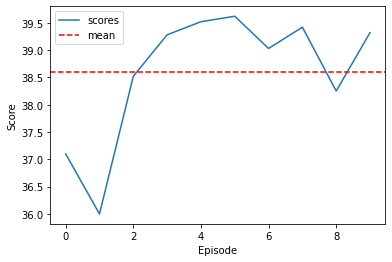

In [6]:
#use trained agent
#train the agent
def ddpg_test(n_episodes):
    #list containing scores from each episode
    scores = []
    for episode in range(n_episodes):
        #Reset the enviroment
        env_info = env.reset(train_mode=training_mode)[brain_name] 
        cur_state = env_info.vector_observations
        score = np.zeros(num_agents)
        #reset noise
        agent.reset()
        while True:
            # Choose best action for given network
            action = agent.act(cur_state, add_noise = False)
            # Action is performed and new state, reward, info are received. 
            env_info = env.step(action)[brain_name]
            # get next state 
            next_state = env_info.vector_observations
            # see if episode is finished
            done = env_info.local_done
            # get reward
            reward = env_info.rewards
            # current state, action, reward, new state are stored in the experience replay"
            #agent.step(cur_state, action, reward, next_state, done)
            # roll over new state
            cur_state = next_state     
            #add reward to score
            score += reward
            
            if np.any(done):
                break
        
        #save most recent score
        scores.append(score)
        print(" Score trained agent:" + str(np.mean(score)))
    
    return scores

scores = ddpg_test(n_episodes)
mean = np.mean(scores)
print("Mean over all episodes: " + str(mean))

#plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label = "scores")
plt.axhline(y=mean, color='r', linestyle='--', label="mean")
plt.ylabel('Score')
plt.xlabel('Episode')
plt.legend()
plt.show()

In [7]:
env.close()